In [1]:
# Import the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Optional: make plots show in notebook
%matplotlib inline



In [2]:
# Load data
data = pd.read_csv('train.csv')

# Look at the first 5 rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']
X = data[features].fillna(data[features].median())
y = data['SalePrice']


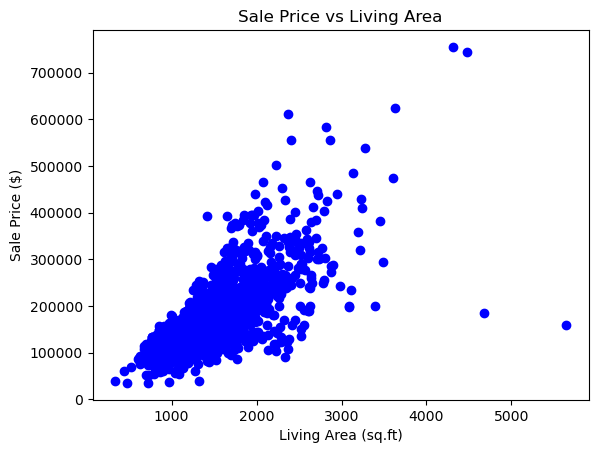

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of living area vs sale price
plt.scatter(data['GrLivArea'], data['SalePrice'], color='blue', marker='o')
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area (sq.ft)')
plt.ylabel('Sale Price ($)')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Split your features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(
    X,      # your chosen features
    y,      # target: SalePrice
    test_size=0.2,  # 20% of data for testing
    random_state=42 # reproducible results
)


In [6]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model with the training data
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict sale prices on test data
predictions = model.predict(X_test)


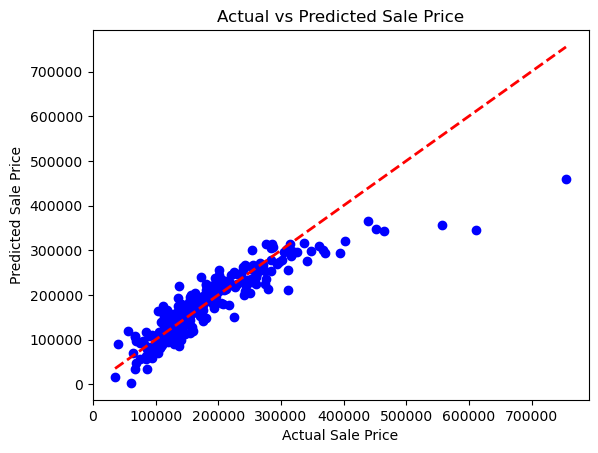

In [8]:
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5
r2 = r2_score(y_test, predictions)

# Print metrics
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): $25,319.86
Root Mean Squared Error (RMSE): $39,710.99
R^2 Score: 0.79


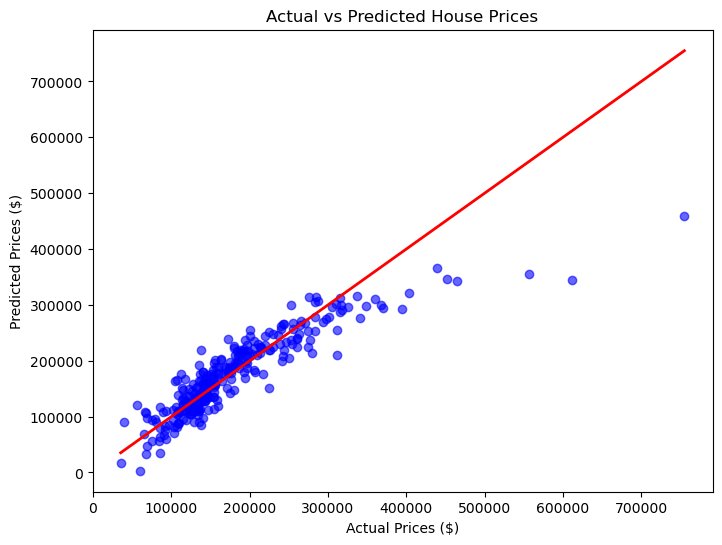

In [10]:
# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # perfect prediction line
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.show()



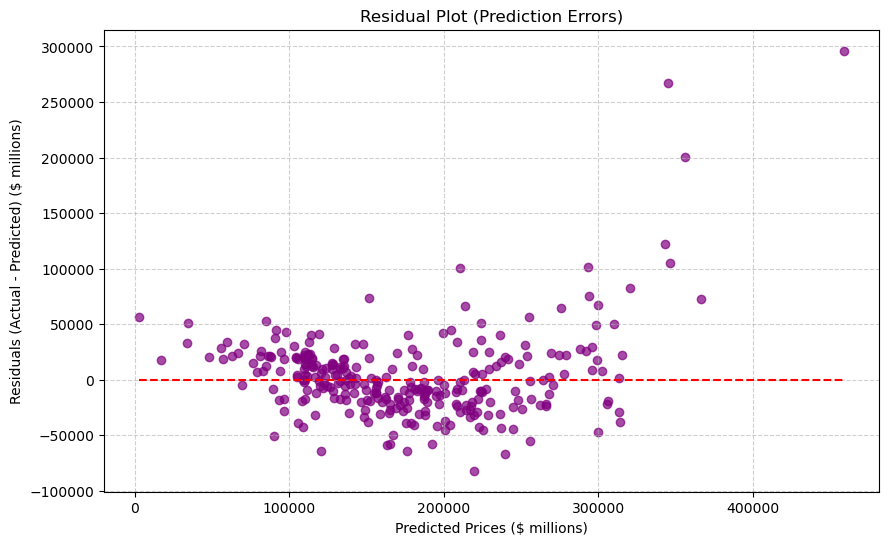

In [11]:
# 10. RESIDUAL PLOT (Error Analysis)
# The residual plot helps check if the model is appropriate. Errors (residuals) should be randomly scattered around the center line (0).
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='purple', alpha=0.7)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red', linestyle='--')
plt.title('Residual Plot (Prediction Errors)')
plt.xlabel('Predicted Prices ($ millions)')
plt.ylabel('Residuals (Actual - Predicted) ($ millions)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [14]:
# 11. MAKE A NEW PREDICTION
# Let's predict a price for a sample input using the features from your model

# The features used for your model are: ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'YearBuilt']

# Create a single example (replace numbers with values that make sense for your dataset)
sample_data = pd.DataFrame({
    'GrLivArea': [2000],   # Example: 2000 sq ft above grade
    'OverallQual': [7],    # Example: Overall quality (7 out of 10)
    'TotalBsmtSF': [1000], # Example: 1000 sq ft basement
    'GarageCars': [2],     # Example: 2-car garage
    'FullBath': [2],       # Example: 2 full bathrooms
    'YearBuilt': [2005]    # Example: Built in 2005
})

# Predict using the trained model
sample_prediction = model.predict(sample_data)

# Print the predicted price in full dollars
print("Predicted House Price: $", round(sample_prediction[0], 2))


Predicted House Price: $ 235512.58


## 11. Project Summary & Reflection
In this project, I built a linear regression model to predict house prices using Python. I cleaned and analyzed the dataset, visualized key relationships, and evaluated model performance with metrics like MAE, MSE, RMSE, and R². The residual plot confirmed that the errors were mostly random, showing the model was a decent fit.  

Through this project, I practiced essential data science skills like:
- Data cleaning and preprocessing  
- Exploratory data analysis (EDA)  
- Building and evaluating machine learning models  
- Visualizing results using Matplotlib  

This project improved my understanding of how data analysis supports real-world decision-making.
